In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from scipy.stats import norm
import random
import math

## Part 1: homoscedastic Gaussian distribution

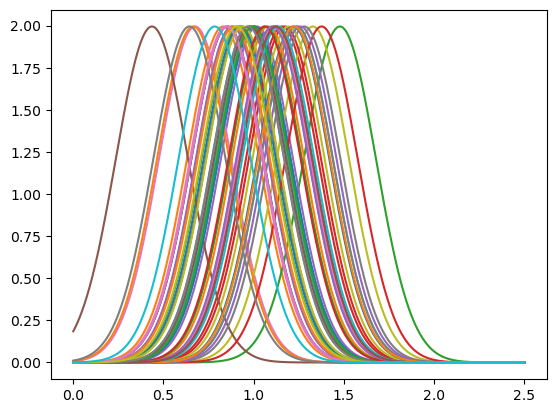

(0.8, 1.2)

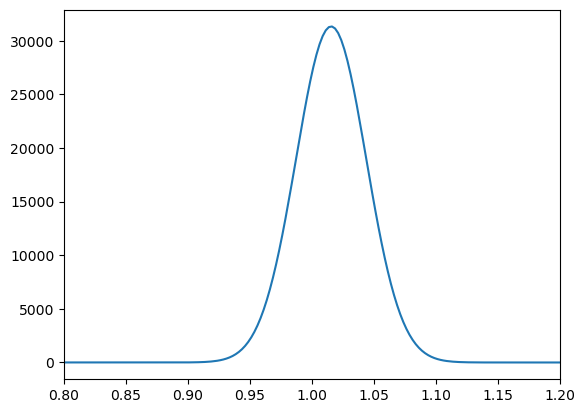

In [11]:
#fake mesuraments of N quasars distributed as a gaussian with known mu and sigma
mu = 1
sigma = 0.2
N = 1000
Nrand = 50
xi=np.random.normal(mu, sigma, Nrand)
x_plot = np.linspace(0, 2.5, N)
L = 1 #define the likelihood for the products of all the likelihoods for each xi

#define a gaussian distribution for each xi and then plots its likelihood
for i in xi:
    dist = norm(i, sigma)
    plt.plot(x_plot, dist.pdf(x_plot)) #singles likelihoods
    L *= dist.pdf(x_plot) #final likelihood as a product of all the singles likelihood

plt.show()
plt.plot(x_plot,L)
plt.xlim(0.8,1.2)

In [12]:
#comparison of the likelihood solution with de MLE estimator derived
maxL = np.max(L)
MLE = x_plot[np.where(L==maxL)]
print((MLE))
print(np.mean(xi))

[1.01601602]
1.0153662031476645


## Part 2 (errors)

-1249.9999999977467
numerical error on mu:  0.028284271247487395
analitical error on mu:  0.0282842712474619


(0.8, 1.2)

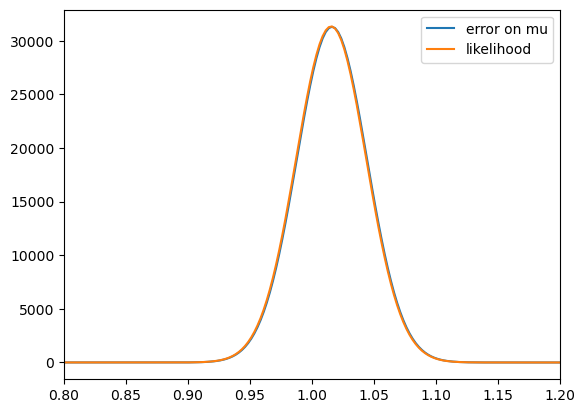

In [22]:
#rough 2nd order derivative with np.diff used recursively (or with n=2 ?)
L2diff = np.diff(np.log(L[L>0]), n=2)[0] / (np.diff(x_plot[L>0])**2)[0]
print(L2diff)
print('numerical error on mu: ', 1/((-L2diff)**0.5))
print('analitical error on mu: ', sigma/(Nrand**0.5))

dist = norm(MLE,1/(-L2diff)**(0.5))
plt.plot(np.linspace(0, 2.5, N), dist.pdf(np.linspace(0, 2.5, N))*2.22*10**3, label='error on mu')
plt.plot(x_plot, L, label='likelihood')
plt.legend()
plt.xlim(0.8,1.2)

## Part 3: heteroscedastic Gaussian distribution

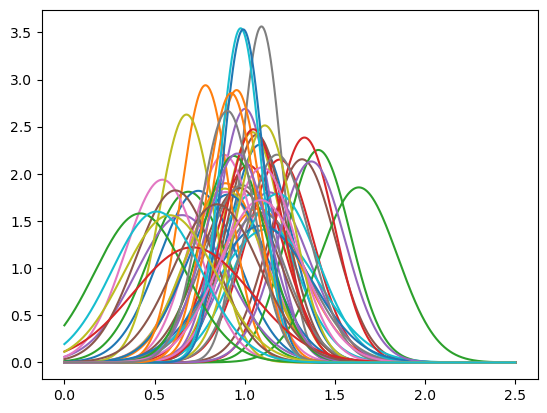

(0.8, 1.2)

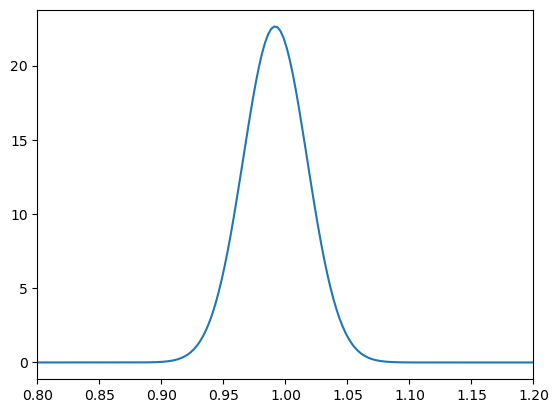

In [30]:
mu = 1
Nrand = 50
N = 1000
sigma = np.random.normal(0.2, 0.05, Nrand)
xi=np.random.normal(mu, sigma, Nrand)
x_plot = np.linspace(0, 2.5, N)
L = 1 #define the likelihood for the products of all the likelihoods for each xi

#define a gaussian distribution for each xi and then plots its likelihood
for i,j in zip(xi,sigma):
    dist = norm(i, j)
    plt.plot(x_plot, dist.pdf(x_plot)) #singles likelihoods
    L *= dist.pdf(x_plot) #final likelihood as a product of all the singles likelihood

plt.show()
plt.plot(x_plot,L)
plt.xlim(0.8,1.2)

In [31]:
#comparison of the likelihood solution with de MLE estimator derived
maxL = np.max(L)
MLE = x_plot[np.where(L==maxL)]
print((MLE))
print(np.sum(xi/sigma**2)/np.sum(sigma**-2))

[0.99099099]
0.9916572631938916


numerical error on mu:  0.02629357599661491
analitical error on mu:  0.025755279043101886


(0.8, 1.2)

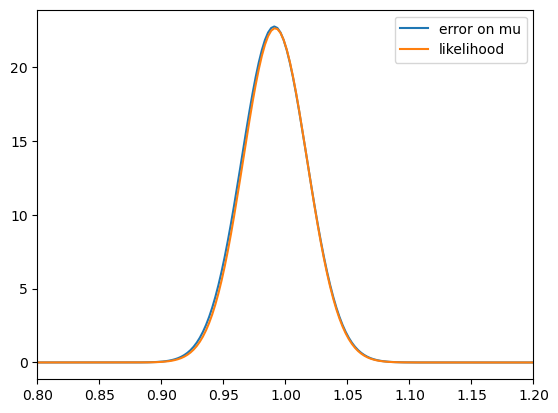

In [41]:
#rough 2nd order derivative with np.diff used recursively (or with n=2 ?)
L2diff = np.diff(np.log(L[L>0]), n=2)[0] / (np.diff(x_plot[L>0])**2)[0]
print('numerical error on mu: ', 1/(-L2diff)**(0.5))
print('analitical error on mu: ', np.sum(sigma**-2)**-0.5)

dist = norm(MLE,1/(-L2diff)**(0.5))
plt.plot(np.linspace(0, 2.5, N), dist.pdf(np.linspace(0, 2.5, N))*1.5, label='error on mu')
plt.plot(x_plot, L, label='likelihood')
plt.legend()
plt.xlim(0.8,1.2)